<h1>THE SPARKS FOUNDATION DATA SCIENCE & BUSINESS ANALYTICS INTERNSHIP</h1>

<h2>Name: Manasvi Rajaram Patil</h2>
<h2>Grip April Batch 2024</h2>

<h2>TASK 06 : DECISION TREE ALGORITHM</h2>

<h3>Importing the Libraries</h3>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<h3>Load the dataset</h3>

In [6]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Checking Missing Values</h3>

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h3>BOXPLOT</h3>

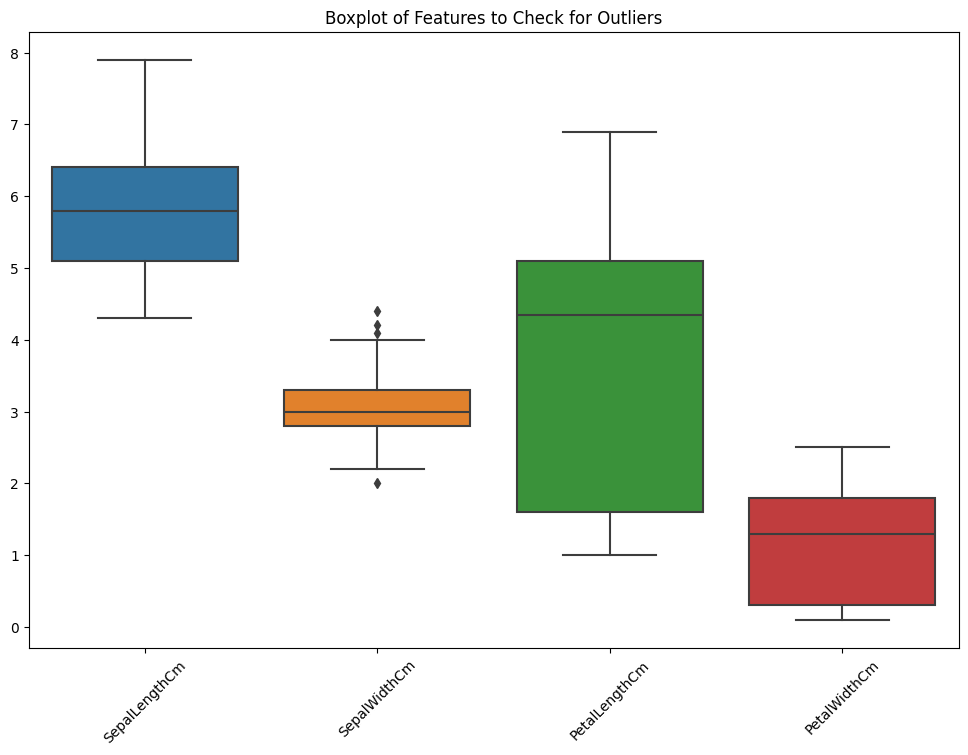

In [18]:
# Checking outliers
import seaborn as sns

# Specify the columns of interest
columns_of_interest = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[columns_of_interest], orient='v')  # Use 'v' for vertical orientation
plt.xticks(rotation=45)
plt.title('Boxplot of Features to Check for Outliers')
plt.show()


<h3>HEATMAP</h3>

C:\Users\Manasvi\AppData\Local\Temp\ipykernel_22392\199887918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


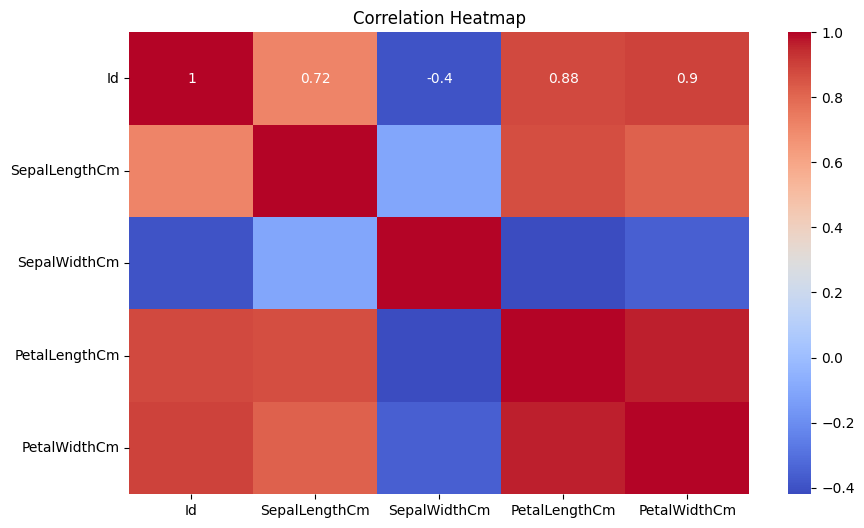

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<h3>HISTPLOT</h3>

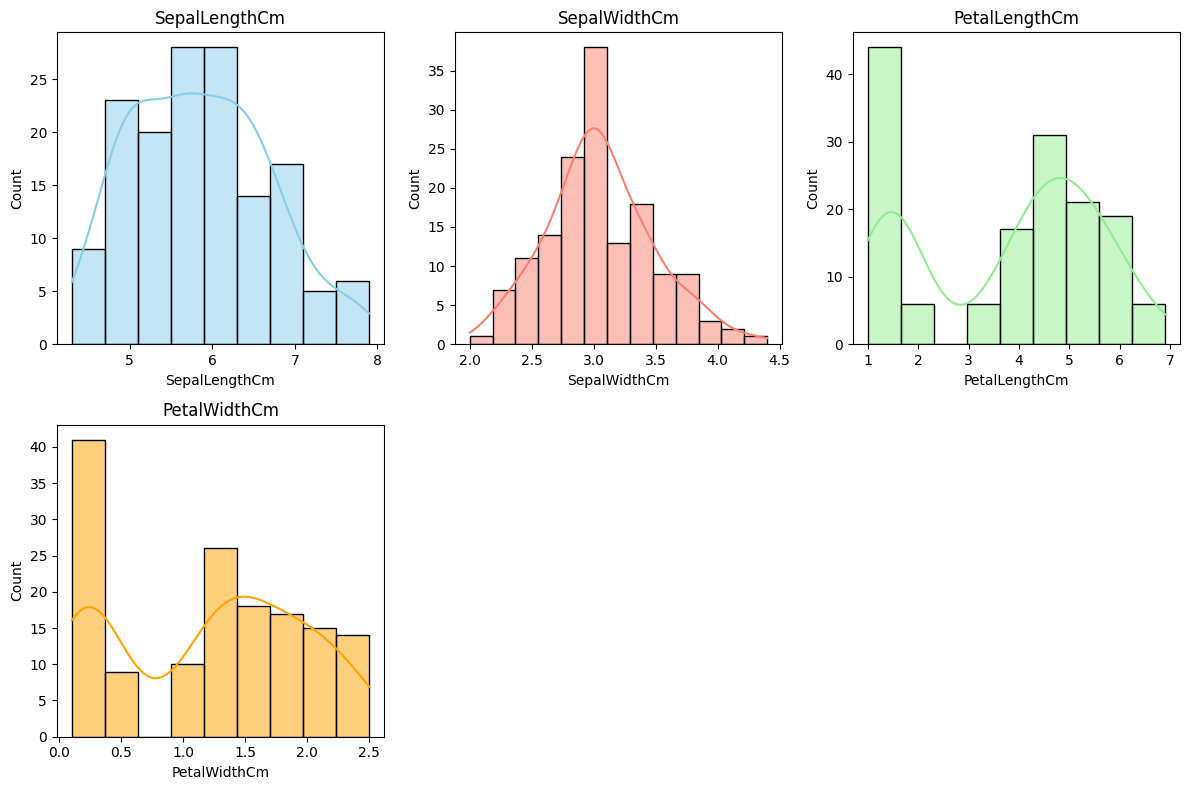

In [24]:
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']  # Define colors for each histogram

for i, column in enumerate(data.columns[1:-1]):  # Excluding 'Id' and 'Species'
    plt.subplot(2, 3, i+1)  # Adjusted for six numerical features
    sns.histplot(data[column], kde=True, color=colors[i])  # Use specified color for each histogram
    plt.title(column)

plt.tight_layout()
plt.show()

<h3>Splitting the data into training & testing sets</h3>

In [ ]:
# Split dataset into features (X) and target variable (y)
X = data.drop(columns=['Id','Species'])
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Decision Tree Algorithm</h3>

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

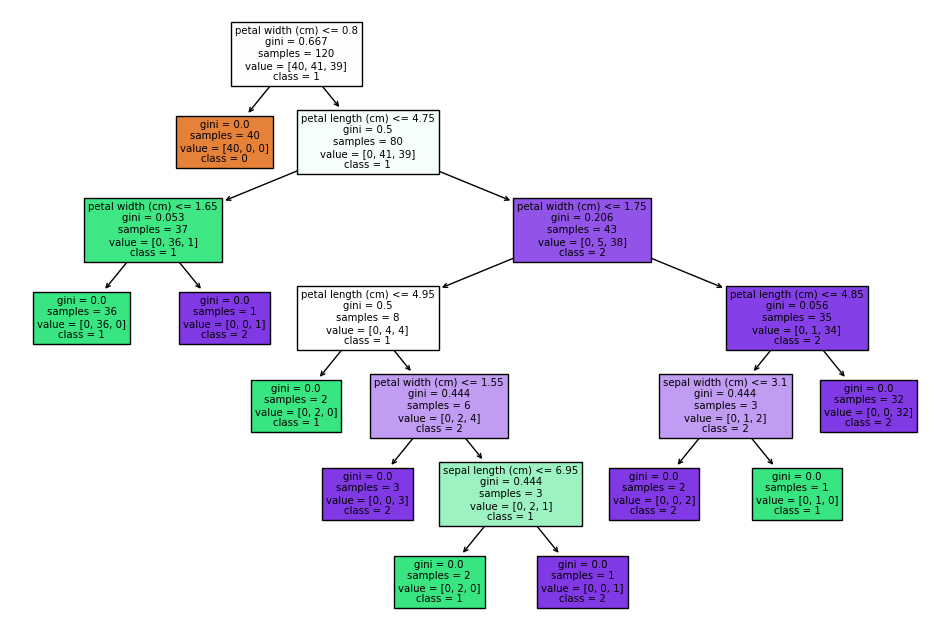

In [27]:
class_names = list(map(str, clf.classes_.tolist()))

# Visualize the trained decision tree
plt.figure(figsize=(12, 8)) 
plot_tree(clf, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()

<h3>Testing the Algorithm on sample data</h3>

In [9]:
# Example of predicting for new data
new_data = [[5.1, 3.5, 1.4, 0.2],  
            [6.2, 2.9, 4.3, 1.3],  
            [7.3, 3.3, 6.0, 2.5]] 

# Convert new data to a DataFrame
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Make predictions
predictions = clf.predict(new_data_df)

# Display predictions
for i, pred in enumerate(predictions):
    print(f"Example {i+1}: Predicted class - {pred}")

Example 1: Predicted class - 0
Example 2: Predicted class - 1
Example 3: Predicted class - 2


<h3>Efficiency of the Decision Tree Classifier</h3>

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


 Conclusion 

1. An accuracy of 1.0 (or 100%) suggests that the model made no mistakes on      the test data. In a classification context, an accuracy of 1.0 means that    every single prediction made by the model matched the true labels in the      test set.

2. Classification Report:
   For each class ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), the      precision, recall, and F1-score are all 1.0, indicating perfect        
   performance.The support column shows the number of samples in the test set    for each class.

3. Confusion Matrix: The confusion matrix confirms that there were no    
   misclassifications. Each class was correctly predicted, as shown by the  
   diagonal elements.
